In [1]:
import pandas as pd

In [16]:
#치킨집 수 데이터 파일 불러오기
df = pd.read_excel('./chicken.xlsx')
df
# 인구수 데이터 파일 불러오기 
population = pd.read_excel('./popultaion1.xlsx', thousands= ',')
population

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,서울특별시 (1100000000),9765623,4263868,2.29,4773899,4991724,0.96,서울특별시
1,서울특별시 종로구 (1111000000),153065,73735,2.08,74825,78240,0.96,서울특별시 종로구
2,서울특별시 중구 (1114000000),125725,61502,2.04,61947,63778,0.97,서울특별시 중구
3,서울특별시 용산구 (1117000000),228999,108974,2.10,110640,118359,0.93,서울특별시 용산구
4,서울특별시 성동구 (1120000000),308221,137209,2.25,151359,156862,0.96,서울특별시 성동구
...,...,...,...,...,...,...,...,...
273,경상남도 거창군 (4888000000),62455,28814,2.17,30340,32115,0.94,경상남도 거창군
274,경상남도 합천군 (4889000000),45916,24076,1.91,22001,23915,0.92,경상남도 합천군
275,제주특별자치도 (5000000000),667191,287104,2.32,335719,331472,1.01,제주특별자치도
276,제주특별자치도 제주시 (5011000000),485946,204621,2.37,243974,241972,1.01,제주특별자치도 제주시


In [17]:
df.head(1)

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549


In [18]:
population.head(2)

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,서울특별시 (1100000000),9765623,4263868,2.29,4773899,4991724,0.96,서울특별시
1,서울특별시 종로구 (1111000000),153065,73735,2.08,74825,78240,0.96,서울특별시 종로구


In [19]:
# df 광역시도 + 시군구
df['시군구_병합'] = df['광역시도'] +' ' +df['시군구']
df.head()

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,시군구_병합
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,경상남도 창원시
1,경기도,수원시,음식,닭/오리요리,144,75,235,450,494,1398,경기도 수원시
2,경기도,고양시,음식,닭/오리요리,174,84,168,437,449,1312,경기도 고양시
3,충청북도,청주시,음식,닭/오리요리,165,71,219,266,424,1145,충청북도 청주시
4,경기도,용인시,음식,닭/오리요리,123,72,130,301,402,1028,경기도 용인시


In [20]:
# merge : pd.merge(A, B, how ='left/right/inner/outer', right_on='')
temp = pd.merge(df, population, how='left', left_on = '시군구_병합', right_on='시군구정리')
temp.head(2)

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,시군구_병합,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,경상남도 창원시,경상남도 창원시 (4812000000),1053601.0,425771.0,2.47,534119.0,519482.0,1.03,경상남도 창원시
1,경기도,수원시,음식,닭/오리요리,144,75,235,450,494,1398,경기도 수원시,경기도 수원시 (4111000000),1201166.0,492939.0,2.44,604918.0,596248.0,1.01,경기도 수원시


In [21]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   광역시도    229 non-null    object 
 1   시군구     229 non-null    object 
 2   업종대분류   229 non-null    object 
 3   업종중분류   229 non-null    object 
 4   1년미만    229 non-null    int64  
 5   1~2년    229 non-null    int64  
 6   2~3년    229 non-null    int64  
 7   3~5년    229 non-null    int64  
 8   5년 이상   229 non-null    int64  
 9   계       229 non-null    int64  
 10  시군구_병합  229 non-null    object 
 11  행정기관    228 non-null    object 
 12  총인구수    228 non-null    float64
 13  세대수     228 non-null    float64
 14  세대당 인구  228 non-null    float64
 15  남자 인구수  228 non-null    float64
 16  여자 인구수  228 non-null    float64
 17  남여 비율   228 non-null    float64
 18  시군구정리   228 non-null    object 
dtypes: float64(6), int64(6), object(7)
memory usage: 35.8+ KB


In [24]:
# 판다스에서 ,로 들어가는 데이터는 문자로 인식한다. 
#  -> , 를 없애고, 숫자형식으로 바꿔줘라고 해야한다.
#  -> 데이터를 불러 올때 ','의 경우 숫자로 인식해줘라고 설정할 수 있다.
##### population = pd.read_excel('./popultaion1.xlsx', thousands= ',')

temp['계_만명당']= temp['계'] / temp['총인구수']*10000 # 주민등록 인구수 10000명당 치킨집수 
# temp['1년미만_만명당'] = temp[1년미만]/temp['총인구수']


0      14.701960
1      11.638691
2      12.564775
3      13.667578
4       9.931158
         ...    
224     8.182249
225    10.947223
226     5.392289
227    14.239219
228     2.908174
Length: 229, dtype: float64

In [26]:
temp.columns

Index(['광역시도', '시군구', '업종대분류', '업종중분류', '1년미만', '1~2년', '2~3년', '3~5년',
       '5년 이상', '계', '시군구_병합', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수',
       '여자 인구수', '남여 비율', '시군구정리'],
      dtype='object')

In [29]:
# 컬럼명별 원하는 데이터를 얻는 함수 짜기 
col_name_list = ['1년미만', '1~2년', '2~3년', '3~5년','5년 이상', '계']
for col_name in col_name_list:
    temp[f'{col_name}_만명당'] = temp[col_name] / temp['총인구수']*10000 
    
temp

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,...,남자 인구수,여자 인구수,남여 비율,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,5년 이상_만명당,계_만명당
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,...,534119.0,519482.0,1.03,경상남도 창원시,1.888761,0.882687,2.951782,4.071750,4.906981,14.701960
1,경기도,수원시,음식,닭/오리요리,144,75,235,450,494,1398,...,604918.0,596248.0,1.01,경기도 수원시,1.198835,0.624393,1.956432,3.746360,4.112671,11.638691
2,경기도,고양시,음식,닭/오리요리,174,84,168,437,449,1312,...,512359.0,531830.0,0.96,경기도 고양시,1.666365,0.804452,1.608904,4.185066,4.299988,12.564775
3,충청북도,청주시,음식,닭/오리요리,165,71,219,266,424,1145,...,421774.0,415975.0,1.01,충청북도 청주시,1.969564,0.847509,2.614148,3.175175,5.061182,13.667578
4,경기도,용인시,음식,닭/오리요리,123,72,130,301,402,1028,...,514127.0,520999.0,0.99,경기도 용인시,1.188261,0.695567,1.255886,2.907859,3.883585,9.931158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,전라북도,장수군,음식,닭/오리요리,4,0,2,5,8,19,...,11533.0,11688.0,0.99,전라북도 장수군,1.722579,0.000000,0.861289,2.153223,3.445157,8.182249
225,경상북도,영양군,음식,닭/오리요리,2,1,3,4,9,19,...,8567.0,8789.0,0.97,경상북도 영양군,1.152339,0.576170,1.728509,2.304678,5.185527,10.947223
226,전라북도,진안군,음식,닭/오리요리,2,0,2,3,7,14,...,13030.0,12933.0,1.01,전라북도 진안군,0.770327,0.000000,0.770327,1.155491,2.696145,5.392289
227,경상북도,울릉군,음식,닭/오리요리,2,0,0,8,4,14,...,5328.0,4504.0,1.18,경상북도 울릉군,2.034174,0.000000,0.000000,8.136697,4.068348,14.239219


In [32]:
#temp.columns  #여러개의 값이 들어있는 리스트 개념
temp.columns[-7:]

Index(['시군구정리', '1년미만_만명당', '1~2년_만명당', '2~3년_만명당', '3~5년_만명당', '5년 이상_만명당',
       '계_만명당'],
      dtype='object')

In [34]:
data_selected = temp[temp.columns[-7:]]
data_selected.head()

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,5년 이상_만명당,계_만명당
0,경상남도 창원시,1.888761,0.882687,2.951782,4.071750,4.906981,14.701960
1,경기도 수원시,1.198835,0.624393,1.956432,3.746360,4.112671,11.638691
2,경기도 고양시,1.666365,0.804452,1.608904,4.185066,4.299988,12.564775
3,충청북도 청주시,1.969564,0.847509,2.614148,3.175175,5.061182,13.667578
4,경기도 용인시,1.188261,0.695567,1.255886,2.907859,3.883585,9.931158


### 인구당 치킨집수가 가장 많은곳, 가장 적은곳

In [38]:
# 실습)
data_selected.sort_values(by='계_만명당').head(10) # 인구대비 치킨집이 가장 적은 곳 10개

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,5년 이상_만명당,계_만명당
228,전라남도 신안군,0.000000,0.000000,0.242348,0.727044,1.938783,2.908174
103,서울특별시 양천구,0.495492,0.646294,0.538578,0.904812,1.680365,4.265541
117,서울특별시 동작구,0.580510,0.504792,0.403833,1.186261,1.842490,4.517886
69,서울특별시 송파구,0.855041,0.840040,0.375018,0.915043,1.590076,4.575217
74,서울특별시 강서구,0.737081,0.485804,0.770585,1.072118,1.876207,4.941796
226,전라북도 진안군,0.770327,0.000000,0.770327,1.155491,2.696145,5.392289
142,서울특별시 용산구,0.480351,0.611356,0.742361,1.484723,2.183416,5.502207
106,경기도 광명시,0.917878,0.428343,0.336555,1.499200,2.784228,5.966204
111,서울특별시 성동구,0.648885,0.551552,0.843551,1.200437,2.822650,6.067075
63,서울특별시 노원구,0.809192,0.680457,0.404596,1.544822,2.629875,6.068943


In [39]:
data_selected.sort_values(by='계_만명당', ascending = False).head(10) # 인구대비 치킨집이 가장 많은 곳 10개

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,5년 이상_만명당,계_만명당
8,강원도 춘천시,4.561003,1.888540,3.919612,8.124287,10.832383,29.325827
157,강원도 인제군,7.157082,1.867065,3.111775,5.601195,11.513567,29.250685
115,경기도 가평군,9.059411,2.860867,1.748307,6.357481,8.900474,28.926539
171,강원도 화천군,5.979908,3.587945,3.189284,6.777229,7.973210,27.507575
110,강원도 홍천군,4.860684,2.287381,2.573303,8.434717,8.577678,26.733763
178,강원도 양구군,5.553657,0.427204,3.417635,6.408066,10.680109,26.486671
169,강원도 고성군,7.816941,3.197840,1.065947,4.974417,8.527572,25.582717
49,경기도 포천시,3.583849,1.725557,1.592822,5.641243,12.941676,25.485147
148,경기도 연천군,3.360742,0.896198,2.464544,6.049336,12.322721,25.093541
146,강원도 철원군,6.463706,1.723655,1.723655,6.679163,7.971904,24.562084


 #### 숫자를 보는 것은 정확하게 보는데 좋지만 흐름을 아는데는 어렵다.
 #### 그래프로 짧고 간단하게 흐름을  보는 게 일반적.  + 이슈/ 중요한 숫자만...

In [ ]:
# 표형태의 데이터를 그래프로 나타내기
# 히트맵 그리기

In [40]:
import seaborn as sns   # seaborn 라이브 러리 사용 --> 'sns'
# sns.그래프명(data= '데이터명')

In [41]:
# 그래프 그리기
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns


# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path ).get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   

In [45]:
# 컬럼을 인덱스로 바꾸기
# heatmap을 그릴 때면 숫자만 있어야 하므로 컬럼/인덱스는 제외하고 표 정리
data_selected_graph = data_selected.set_index('시군구정리')
data_selected_graph

,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,5년 이상_만명당,계_만명당
시군구정리,,,,,,
경상남도 창원시,1.888761,0.882687,2.951782,4.071750,4.906981,14.701960
경기도 수원시,1.198835,0.624393,1.956432,3.746360,4.112671,11.638691
경기도 고양시,1.666365,0.804452,1.608904,4.185066,4.299988,12.564775
충청북도 청주시,1.969564,0.847509,2.614148,3.175175,5.061182,13.667578
경기도 용인시,1.188261,0.695567,1.255886,2.907859,3.883585,9.931158
...,...,...,...,...,...,...
전라북도 장수군,1.722579,0.000000,0.861289,2.153223,3.445157,8.182249
경상북도 영양군,1.152339,0.576170,1.728509,2.304678,5.185527,10.947223
전라북도 진안군,0.770327,0.000000,0.770327,1.155491,2.696145,5.392289


In [ ]:
#원하는 데이터로 sorting
data_selected_graph.sort_values(by = '계_만명당', ascending = False).head(30)

In [ ]:
# 상위 30위 지역 데이터만 사용
top = data_selected_graph.sort_values(by = '계_만명당', ascending = False).head(30)
top[top.colums[-1]]

# 하위 30위 지역 데이터만 사용
bottom = data_selected_graph.sort_values(by = '계_만명당', ascending = False).tail(30)
bottom[bottom.colums[-1]]

<AxesSubplot:title={'center':'주민인구만명당치킨집수비교'}, ylabel='시군구정리'>

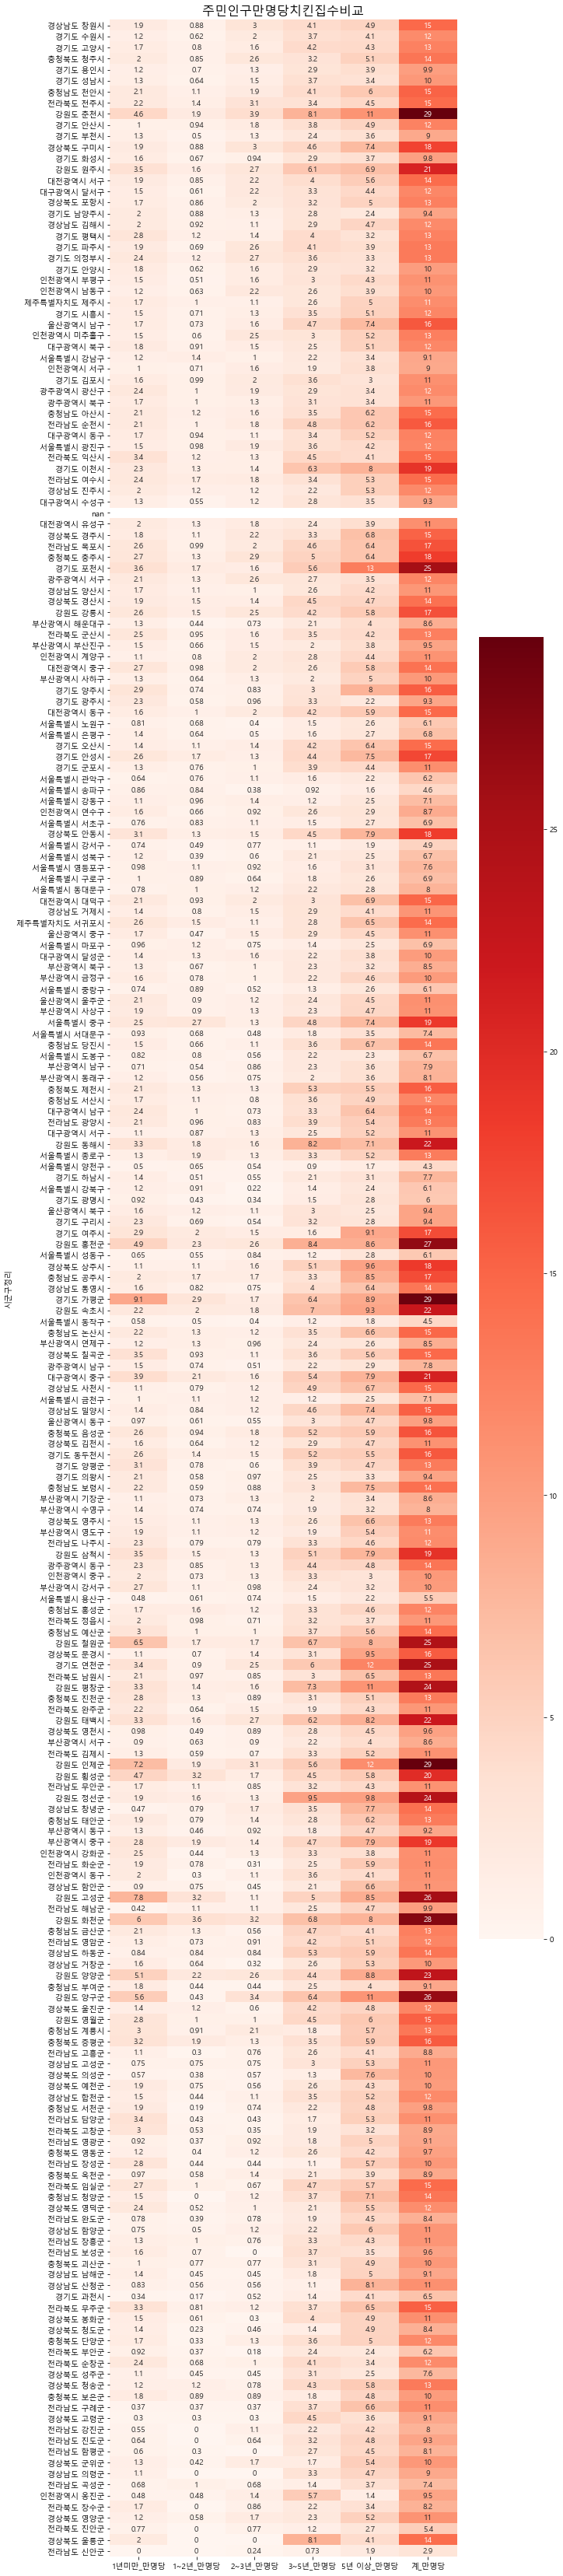

In [52]:
# # 그림 사이즈 지정
# fig, ax = plt.subplots(figsize=(10, 60))
# # 그래프 제목 붙이기
# plt.title('주민인구만명당치킨집수비교', fontsize=10)
# # 히트맵 그리기
# sns.heatmap(data=data_selected_graph, annot=True, fmt='.1f', cmap="RdYlBu_r")
# fig.savefig('./img/주민인구만명당치킨집수.png')


# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,60) )
#그래프 제목 붙이기
plt.title('주민인구만명당치킨집수비교', fontsize = 16)
# 히트맵그리기
sns.heatmap(data = data_selected_graph,
           annot = True,  # annotation
            cmap = 'Reds',
           ) # 색변경